### Polynomial Linear Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()
sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, POSITION_SALARIES

In [6]:
#loading the dataset
df = pd.read_csv(POSITION_SALARIES)
print(f'Shape of the dataset: {df.shape}')

#feature variable and target variable
X = df.iloc[:,1:-1].values
y = df[['Salary']].values

Shape of the dataset: (10, 3)


In [43]:
#training the linear regression model
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(X,y)

LinearRegression()

In [44]:
#training the polynomail regression model
from sklearn.preprocessing import PolynomialFeatures

degree = 4
ln_reg_poly = PolynomialFeatures(degree=degress)
X_poly = ln_reg_poly.fit_transform(X)

#defining the separate regression model for poly
ln_poly = LinearRegression()
ln_poly.fit(X_poly,y) # linear reg gaves us straight line, poly has curved


LinearRegression()

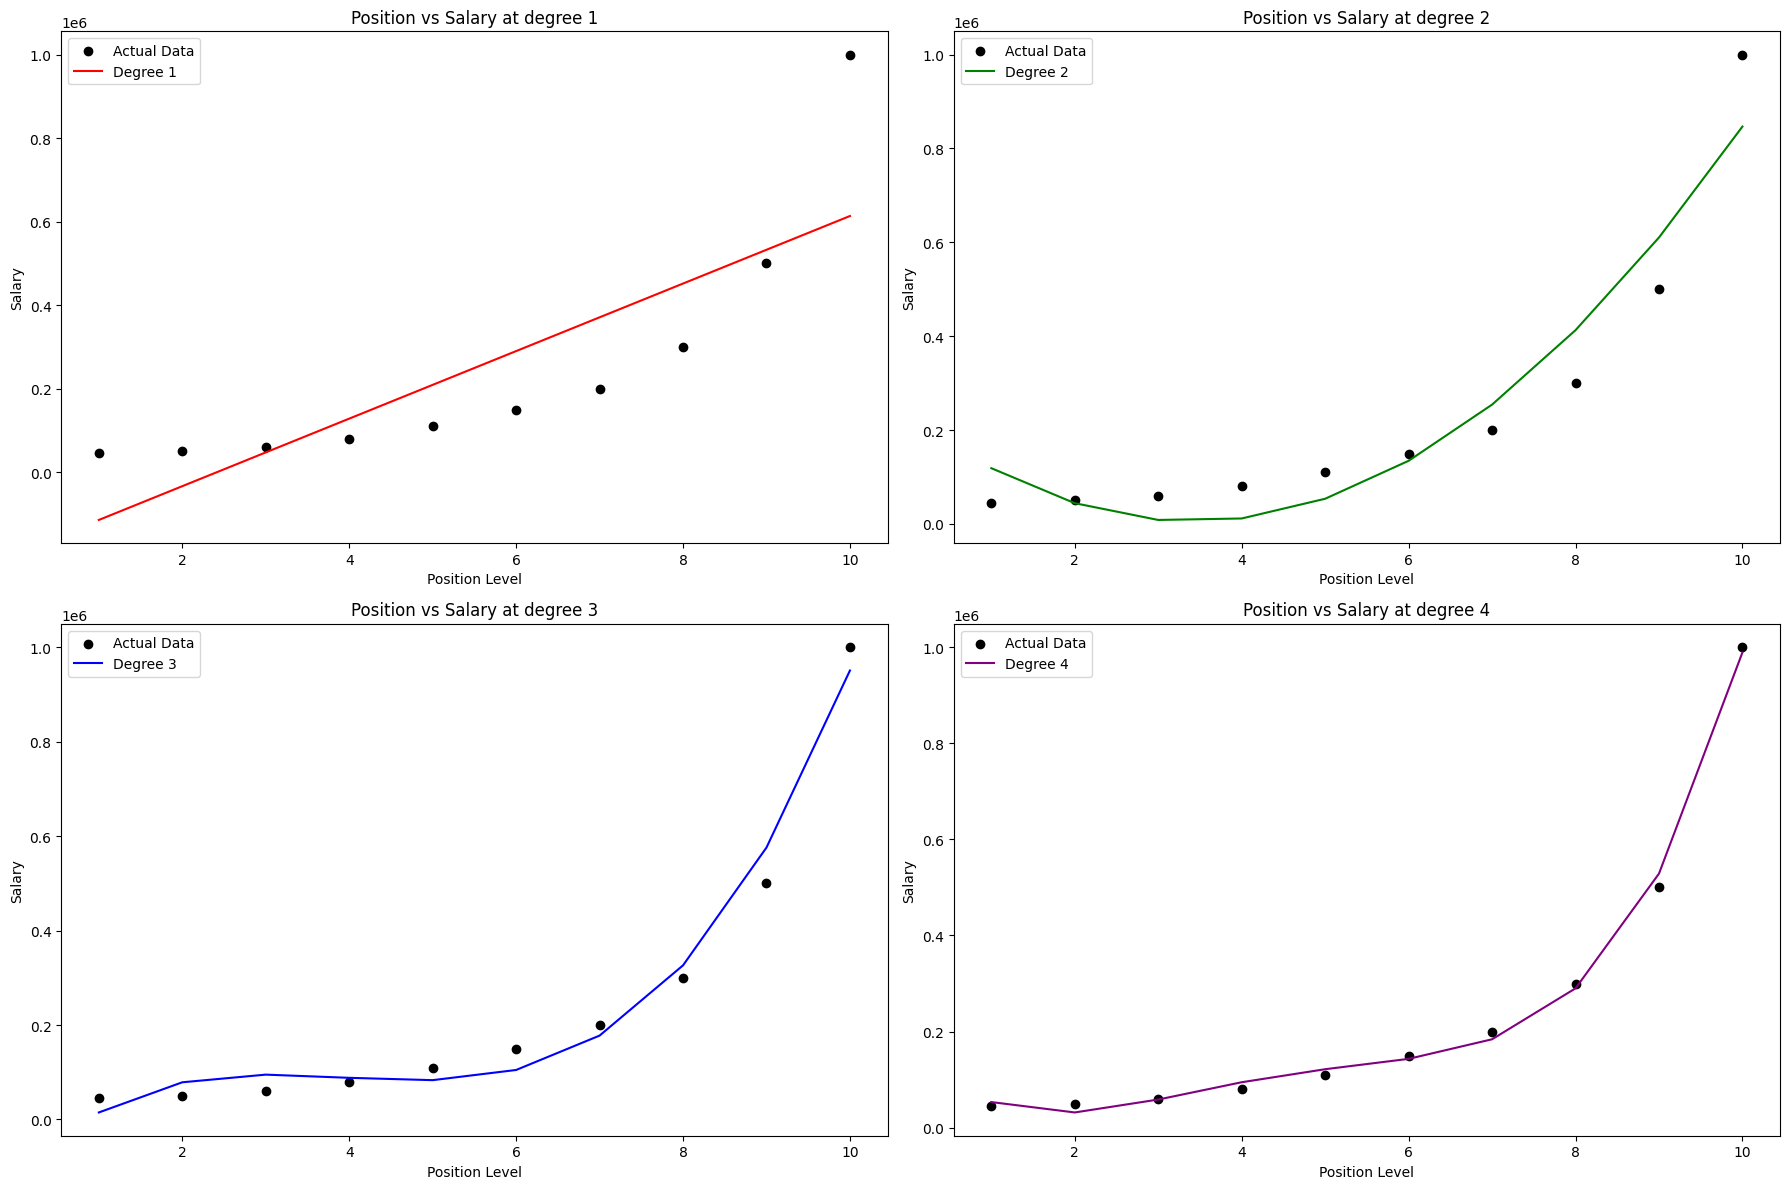

In [45]:
#Visualization by different degrees


degrees = [1,2,3,4]
colors= ['Red',  'Green', 'Blue', 'Purple']
plt.figure(figsize=(18,12))

for i, degree in enumerate(degrees):
    plt.subplot(2,2, i+1)

    #fit the model
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    ln_degree = LinearRegression()
    ln_degree.fit(X_poly,y)

    pred_y = ln_degree.predict(X_poly)

    plt.scatter(X,y,color='black',label='Actual Data')
    plt.plot(X,pred_y,color=colors[i],label=f'Degree {degree}')
    plt.title(f'Position vs Salary at degree {degree}')
    plt.ylabel('Salary')
    plt.xlabel('Position Level')
    plt.legend()

plt.tight_layout()
plt.show()

In [54]:
#Model Evalution Metrics
from sklearn.metrics import r2_score

#linear regression y_pred
y_pred_linear = ln_reg.predict(X)

#polynomial Regression y_pred 
y_pred_poly = ln_poly.predict(X_poly)

print(f'R2 score for Linear Regression model: {r2_score(X,y_pred_linear)}\n')

print(f'R2 score for polynomail Regression Model: {r2_score(y,y_pred_poly)}')



R2 score for Linear Regression model: -14086368756.651054

R2 score for polynomail Regression Model: 0.9973922891706613


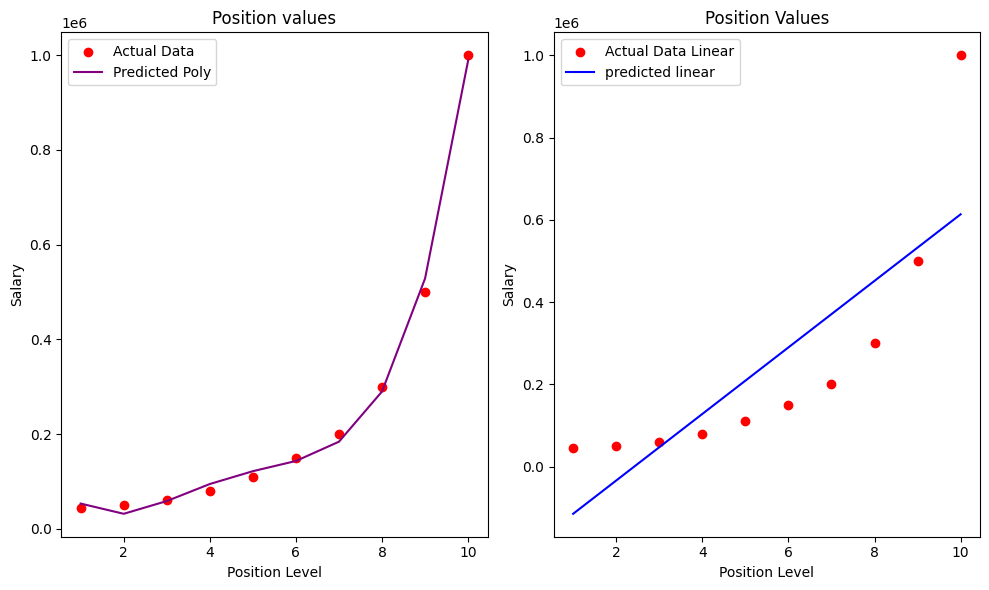

In [67]:
#visualize the comparsion:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(X,y,color='r',label='Actual Data')
plt.plot(X,ln_poly.predict(X_poly),color='purple',label='Predicted Poly')
plt.title('Position values')
plt.ylabel("Salary")
plt.xlabel("Position Level")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X,y,color='r',label='Actual Data Linear')
plt.plot(X,ln_reg.predict(X),color='blue',label='predicted linear')
plt.title("Position Values")
plt.ylabel("Salary")
plt.xlabel("Position Level")
plt.legend()

plt.tight_layout()
plt.show()
